<a id='start'></a>
# Clusterizzazione e Classificazione

In questo notebook viene spiegato cosa sono e come possiamo realizzare dei Decision Tree con Python. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [Clusterizzazione K-means](#section1)
    - [K-means](#section10)
    - [The elbow method](#section11)
- [Classificazione](#section2)
    - [Lavoriamo con Python](#section3)
    - [Classificazione con due features](#section4)
    - [Classificazione con tutte le feature](#section5)

<a id='section1'></a>
## Clusterizzazione

In statistica, il clustering o analisi dei gruppi (dal termine inglese cluster analysis introdotto da Robert Tryon nel 1939) è un insieme di tecniche di analisi multivariata dei dati volte alla selezione e raggruppamento di elementi omogenei in un insieme di dati. Le tecniche di clustering si basano su misure relative alla somiglianza tra gli elementi. In molti approcci questa similarità, o meglio, dissimilarità, è concepita in termini di distanza in uno spazio multidimensionale. La bontà delle analisi ottenute dagli algoritmi di clustering dipende molto dalla scelta della metrica, e quindi da come è calcolata la distanza. Gli algoritmi di clustering raggruppano gli elementi sulla base della loro distanza reciproca, e quindi l'appartenenza o meno ad un insieme dipende da quanto l'elemento preso in esame è distante dall'insieme stesso.

<img src="img/kmeans.png">

<a id='section10'></a>
### K-means

L'algoritmo K-means è un algoritmo di clustering partizionale che permette di suddividere un insieme di oggetti in K gruppi sulla base dei loro attributi. È una variante dell'algoritmo di aspettativa-massimizzazione (EM) il cui obiettivo è determinare i K gruppi di dati generati da distribuzioni gaussiane. Si assume che gli attributi degli oggetti possano essere rappresentati come vettori, e che quindi formino uno spazio vettoriale.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

Carichiamo i dati che rappresentano la lingua parlata in alcuni paesi (nell'esempio saranno riportati solo 6 paesi per):

In [3]:
# Load the country clusters data
data = pd.read_csv('data/Country-clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


Proviamo da subito a disegnare i dati per vederne una rappresentazione grafica:

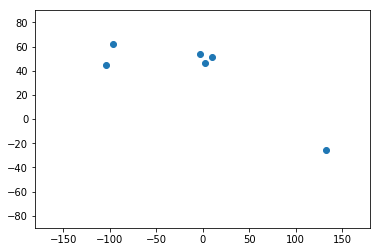

In [4]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'], data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Selezioniamo le features:

In [5]:
x = data[['Latitude', 'Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


Ora possiamo passare al compito di clusterizzazione:

In [6]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [8]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


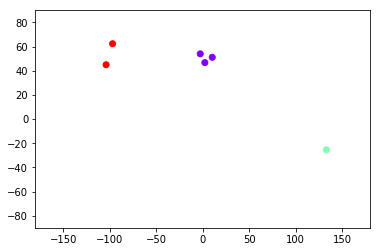

In [9]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

<a id='section11'></a>
### The elbow method

Nell'esempio appena visto abbiamo selezionato 3 cluster perchè, anche visivamente, questa sembrava essere la scelta più adatta.

Come si fa però a determinare il numero corretto di cluster da creare nei dati che abbiamo in ingresso? Per svolgere questo compito ci viene in contro un metodo detto "the elbow method" ovvero il metodo del gomito.

Per comprendere il procedimento iniziamo a fare una clusterizzazione con un numero arbitrario di gruppi, ad esempio proviamo con 2.

In [10]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)

# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [11]:
# Create a copy of the mapped data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


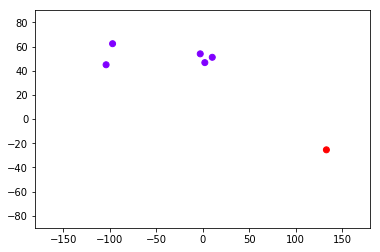

In [12]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Usiamo il metodo WCSS (within-cluster sum of squares) che è una misura sviluppata all'interno del framework ANOVA.

Questa misura dà una idea molto buona della distanza tra i diversi cluster e all'interno dei cluster, quindi permette di decidere il numero appropriato di cluster.

In [13]:
# Get the WCSS for the current solution
# WCCS or inertia is the sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

13205.758119999999

Possiamo ri-eseguire il procedimento cercando di volta in volta un numero crescente di cluster:

In [14]:
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
    
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Se plottiamo questi risultati, siamo in grado di vedere il risultato della misura WCSS in base al variare del numero di cluster:

Text(0, 0.5, 'Within-cluster Sum of Squares')

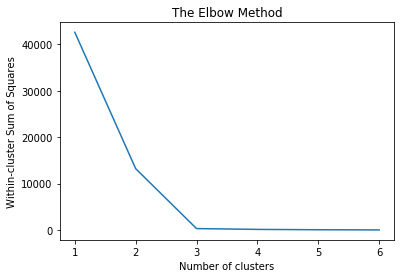

In [15]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Il numero ottimale di cluster si trova nel punto in cui la linea di questo grafico effettua la deviazione più significativa. Come è possibile vedere questo valore, nel caso mostrato, si ha in corrispondenza di 3 cluster e quindi 3 è il numero ideale di cluster da creare.

<a id='section2'></a>
## Classificazione

La classificazione è, insieme alla regressione, uno dei due problemi principali dell'apprendimento supervisionato, la branca del machine learning che si occupa di insegnare ai computer come risolvere determinati problemi mostrandogli esempi di come questi sono già stati risolti in passato. 

Matematicamente il problema dell'apprendimento supervisionato può essere a ridotto a: ho una o più variabil indipendenti x e una variabile dipendente y, devo trovare una funzione f tale che f(x) sia uguale a y. Niente di più, niente di meno. 

In gergo tecnico l'insieme delle varibili indipendenti x vengono chiamate features e la varibile y viene chiamata target. 
La differenza principale tra regressione e classificazione è:

- In un problema di regressione la variabile y è continua (cioè un numero).
- In un problema di classificazione la variabile y è categoria, ovvero un insieme finito di valori, i cosidetti labels, che solitamente rappresentano l'appartenenza ad una classe. 
- Alcuni problemi che possono essere affrontati con un modello di classificazione sono ad esempio:

Riconoscere oggetti nelle foto.
- Effettuare diagnosi cliniche.
- Comprendere lo stato d'animo di una persona da un tweet.

Per un semplice problema di classificazione con due features e due classi, il problema può essere rappresentato geometricamente come trovare l'equazione della retta che meglio riesce a dividere le due classi.

<img src="img/classificazione.png" width="50%">

Quando le classi da predire sono solo due si parla di classificazione binaria, in questi casi il modello non fa altro che rispondere con un si o con un no

E' un gatto nella foto ? SI/NO
Ha il paziente la varicella ? SI/NO
La persona che ha scritto questo tweet è incazzata ? SI/NO


In questo articolo proveremo a eseguire una classificazione binaria per classificare tumori al seno come benigni o maligni, basandoci su alcune proprietà estratte da immagini digitalizzate. A questo scopo utilizzeremo il [Wisconsis Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

<a id='section3'></a>
### Lavoriamo con Python

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

Utilizzando Pandas importiamo il dataset direttamente dalla repo all'interno di un DataFrame, una speciale struttura dati che permette di immagazzinare dati in maniera tabulare. 
Purtroppo ci tocca definire manualmente i nomi di tutte le colonne.

In [51]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Tramite il metodo info del DataFrame possiamo visualizzare diverse informazioni sulle varie colonne.

In [18]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Il dataset contiene 32 colonne, 1 di queste, diagnosis, è il nostro target, mentre le altre sono potenziali features, tranne id, di questo non ce ne facciamo nulla.
Osserva bene che il tipo di diagnosis è object, mentre tutte le altre colonne contengono numeri.

In [52]:
classes = breast_cancer["diagnosis"].unique()
classes

array(['M', 'B'], dtype=object)

Utilizzando il metodo unique possiamo osservare gli elementi unici contenuti in diagnosis, come puoi vedere questa è composta da due valori, M e B, che sono dei label indicanti rispettivamente un tumore maligno e uno benigno.

<a id='section4'></a>
### Classificazione con due features

Siccome il nostro obiettivo è sviluppare un modello semplice, selezioniamo solo due colonne e promuoviamole a features del nostro modello, optiamo per le seguenti:

- radius_se: l'errore standard del raggio del tumore
- concave points_worst: il numero peggiore di punti di concavità nel contorno del tumore.

Adesso creiamo due array numpy, uno contenente le features e l'altro il target.

In [53]:
X = breast_cancer[['radius_se', 'concave points_worst']].values
Y = breast_cancer['diagnosis'].values

Per poter valutare la qualità del nostro modello dobbiamo suddividere il nostro dataset in 2 set differenti:

- un train set: che ci servirà per addestrare il modello.
- un test set: che ci servirà per testarlo.

Questa suddivisione è necessaria per verificare che il modello abbia effettivamente imparato qualcosa e che sia in grado di generalizzare su dati non visti durante l'addestramento.

Possiamo eseguire la suddivisione utilizzando la funzione train_test_split, assegnando il 70% dei dati al train set e il 30% al test set.

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Ricorderai che la colonna diagnosis contiene dei caratteri, ma a noi servono dei numeri !
Una tecnica da adoperare in questi casi è codificare gli oggetti sotto forma di numeri, nel nostro caso la codifica che andremo a fare è la seguente:

- M => Classe positiva = 1
- B => Classe negativa = 0

Per farlo possiamo utilizzare la classe LabelEncoder. LabelEncoder appartiene alla categoria dei trasformatori di scikit-learn, che si occupano di eseguire trasformazioni i dati. Un trasformatore viene inizializzato con il metodo fit, che si occupa di effettuare tutti i calcoli necessari per poi poter eseguire la trasformazione utilizzando il metodo transform.

In [55]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)
np.unique(Y_test)

array([0, 1])

Come vedi i caratteri sono stati codificati in numeri, la funzione unique usata qui è l'equivalente di numpy del metodo unique del DataFrame che abbiamo usato prima.

La classe fit_transform è una scorciatoia che equivale a chiamare prima fit e poi transform sui dati passati come parametro. 

Prima di costruire un modello bisogna essere sicuri che i dati siano sulla stessa scala, altrimenti si rischia che questo attribuisca maggiore importanza alle features con magnitudine maggiore. 
Riprendiamo un momento il nostro DataFrame, selezioniamo solo le nostre due features e utilizziamo il metodo describe per ottenere le informazioni statistiche (in alternativa avremmo potuto utilizzare le funzioni np.min e np.max sui nostri array numpy).

In [56]:
breast_cancer[["radius_se", "concave points_worst"]].describe()

,radius_se,concave points_worst
count,569.000000,569.000000
mean,0.405172,0.114606
std,0.277313,0.065732
min,0.111500,0.000000
25%,0.232400,0.064930
50%,0.324200,0.099930
75%,0.478900,0.161400
max,2.873000,0.291000


Osservando i valori minimi e massimi delle due colonne puoi vedere che la colonna radius_se si trova in un range di valore 10 volte superiore rispetto a concave points_worst.
Per portare le features su di una scala comune abbiamo due possibilità:

- Normalizzare: portare tutti i dati in un range compreso tra 0 e 1.
- Standardizzare: creare una distribuzione normale, cioè con media 0 e deviazione standard 1.

Optiamo per la standardizzazione, possiamo eseguirla utilizzando la classe trasformatore StandardScaler di scikit-learn.

In [57]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Adesso siamo pronti per creare il nostro modello di classificazione, il modello che implementeremo è la regressione logistica, che oltre alla classe di appartenenza ritorna anche la probabilità di quanto la classificazione sia corretta.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Abbiamo il nostro modello! E ora?
Adesso dobbiamo valutare quanto effettivamente sia buono, per farlo possiamo utilizzare il test set e due metriche:

- Accuracy: semplicemente conta quante delle classificazioni fatte dal modello sono corrette, ritorna un valore tra 0 e 1, maggiore è meglio
- Negative Log-likelihood (log loss): tiene conto della probabilità, ritorna un valore tra 0 ed 1, minore è meglio

Entrambe le funzioni sono implementate in scikit-learn

In [59]:
Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: " + str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: " + str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9415204678362573
LOG LOSS: 0.14855491882671087


Un altro modo per valutare la bontà dell'algoritmo di classificazione, possiamo calcolare la cosiddetta confusion matrix:

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[107,   4],
       [  6,  54]], dtype=int64)

Proviamo a disegnarla per comprenderne meglio il significato:

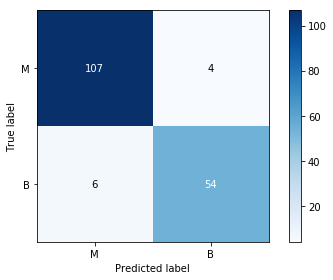

In [61]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
        
fig.tight_layout()

Quelli mostrati nella matrice qui sopra sonoi valori classificati erroneamente solo nell'insieme di test.
Se volessimo vedere, nel nostro dataset, tutti i valori classificati in modo errato potremmo semplicemente usare il modello per stimare nuovamente la classificazione di tutti i dati nel nostro dataset e quindi stampare i valori con predizione diversa dalla diagnosi:

In [62]:
X_all = breast_cancer[['radius_se', 'concave points_worst']].values
X_all = ss.transform(X_all)

prev_value = lr.predict(X_all)
prev_value = le.inverse_transform(prev_value)

breast_cancer['prediction'] = prev_value
breast_cancer.loc[breast_cancer.diagnosis != breast_cancer.prediction]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452,B
13,846381,M,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,27.66,112.00,876.5,0.11310,0.19240,0.2322,0.11190,0.2809,0.06287,B
40,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,30.25,102.50,787.9,0.10940,0.20430,0.2085,0.11120,0.2994,0.07146,B
41,855563,M,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,35.34,87.22,514.0,0.19090,0.26980,0.4023,0.14240,0.2964,0.09606,B
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,22.65,65.50,324.7,0.14820,0.43650,1.2520,0.17500,0.4228,0.11750,M
73,859983,M,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,...,20.86,110.30,812.4,0.14110,0.35420,0.2779,0.13830,0.2589,0.10300,B
81,8611161,B,13.340,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,...,23.19,96.66,614.9,0.15360,0.47910,0.4858,0.17080,0.3527,0.10160,M
86,86135501,M,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,...,29.25,108.40,808.9,0.13060,0.19760,0.3349,0.12250,0.3020,0.06846,B
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,...,18.24,109.40,803.6,0.12770,0.30890,0.2604,0.13970,0.3151,0.08473,M
100,862717,M,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,...,35.27,108.60,906.5,0.12650,0.19430,0.3169,0.11840,0.2651,0.07397,B


Trattandosi di un modello estremamente semplice, con sole due features, i risultati non sono malvagi. 
Visualizziamo cosa il modello ha imparato all'interno di un grafico.

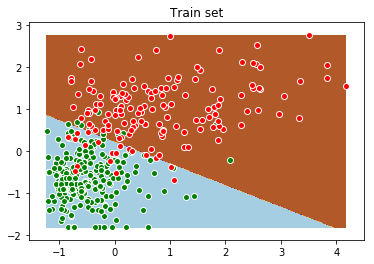

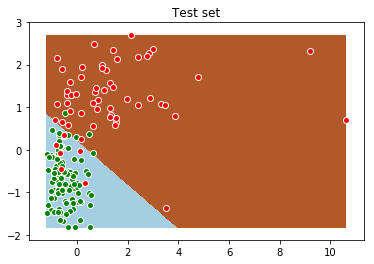

In [26]:
def showBounds(X, Y, model, title=None):
    h = .02 
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.title(title)
    plt.scatter(X_b[:, 0], X_b[:, 1], c='green',  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c='red',  edgecolor='white')
    plt.show()
    
showBounds(X_train, Y_train, lr, title='Train set')
showBounds(X_test, Y_test, lr, title='Test set')

La funzione showBounds è abbastanza complessa e spiegarla riga per riga porterebbe via troppo tempo, in sostanza quello che fa è:

- Creare uno scatterplot con gli esempi corrispondenti a tumori maligni (in rosso)
- Creare uno scatterplot con gli esempi corrispondenti a tumori benigni (in verde)
- Eseguire una predizione per ogni punto del grafico, ricorda che l'asse delle x corrisponde alla feature radius_se, mentre quella delle y alla feature concave points_worst, se il punto viene classificato come maligno allora lo colora di marroncino, se invece viene classificato come benigno lo colora di azzurro, il confine che separa i due colori è il decision boundary. Se vuoi una spiegazione più dettagliata fammelo sapere nei commenti :).

<a id='section5'></a>
### Classificazione con tutte le feature

Vediamo un po' cosa accade sfruttando tutte le colonne del dataset originale come features.

In [27]:
X = breast_cancer.drop('diagnosis',axis=1).values
Y = breast_cancer['diagnosis'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
Y_pred_proba = lr.predict_proba(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

ACCURACY: 0.9649122807017544
LOG LOSS: 0.11068153613896327


Avendo più informazioni a disposizione, il modello addestrato con tutte le features è notevolmente migliore, questo dimostra il ruolo fondamentale che hanno i dati nel machine learning.

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>